<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Maximum_Sum_Submatrix_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Sum Submatrix

You're given a two-dimensional array (a matrix) of potentially unequal height and width that's filled with integers. You're also given a positive integer `size`. Write a function that returns the maximum sum that can be generated from a submatrix with dimensions `size * size`.

For example, consider the following matrix:


```
[
  [2, 4],
  [5, 6],
  [-3, 2],
]
```

If `size = 2`, then the 2x2 submatrices to consider are:


```
[2, 4]
[5, 6]
```
```
[5, 6] 
[-3, 2]
```


The sum of the elements in the first submatrix is 17, and the sum of the elements in the second submatrix is 10. In this example, your function should return 17.

Note: `size` will always be at least 1, and the dimensions of the input matrix will always be at least `size * size`.



Sample Input

```
matrix = 
[
  [5, 3, -1, 5],
  [-7, 3, 7, 4],
  [12, 8, 0, 0],
  [1, -8, -8, 2],
]
size = 2
```



Sample Output

```
18
// [
//   [., ., ., .],
//   [., 3, 7, .],
//   [., 8, 0, .],
//   [., ., ., .],
// ]
```


# Solution 1

In [1]:
# Time O(wh)
# Space O(wh)

def maximumSumSubmatrix(matrix, size):
  sum_matrix = create_sum_matrix(matrix)
  max_sum_submatrix = float('-inf')
  for row in range(size - 1, len(matrix)):
    for col in range(size - 1, len(matrix[row])):
      total = sum_matrix[row][col]

      at_top_boarder = row - size < 0 
      if not at_top_boarder:
        total -= sum_matrix[row - size][col]

      at_left_boarder = col - size < 0 
      if not at_left_boarder:
        total -= sum_matrix[row][col - size]

      if not at_top_boarder and not at_left_boarder:
        total += sum_matrix[row - size][col - size]

      max_sum_submatrix = max(max_sum_submatrix, total)

  return max_sum_submatrix

def create_sum_matrix(matrix):
  sum_matrix = [[0 for _ in range(len(matrix[0]))] for _ in range(len(matrix))]
  for row in range(len(matrix)):
    for col in range(len(matrix[row])):
      sum_matrix[row][col] = matrix[row][col]
      if row > 0:
        sum_matrix[row][col] += sum_matrix[row - 1][col]
      if col > 0: 
        sum_matrix[row][col] += sum_matrix[row][col - 1]
      if row > 0 and col > 0:
        sum_matrix[row][col] -= sum_matrix[row - 1][col - 1]

  return sum_matrix

In [2]:
matrix = [
  [5, 3, -1, 5],
  [-7, 3, 7, 4],
  [12, 8, 0, 0],
  [1, -8, -8, 2],
]
size = 2

maximumSumSubmatrix(matrix, size)

18

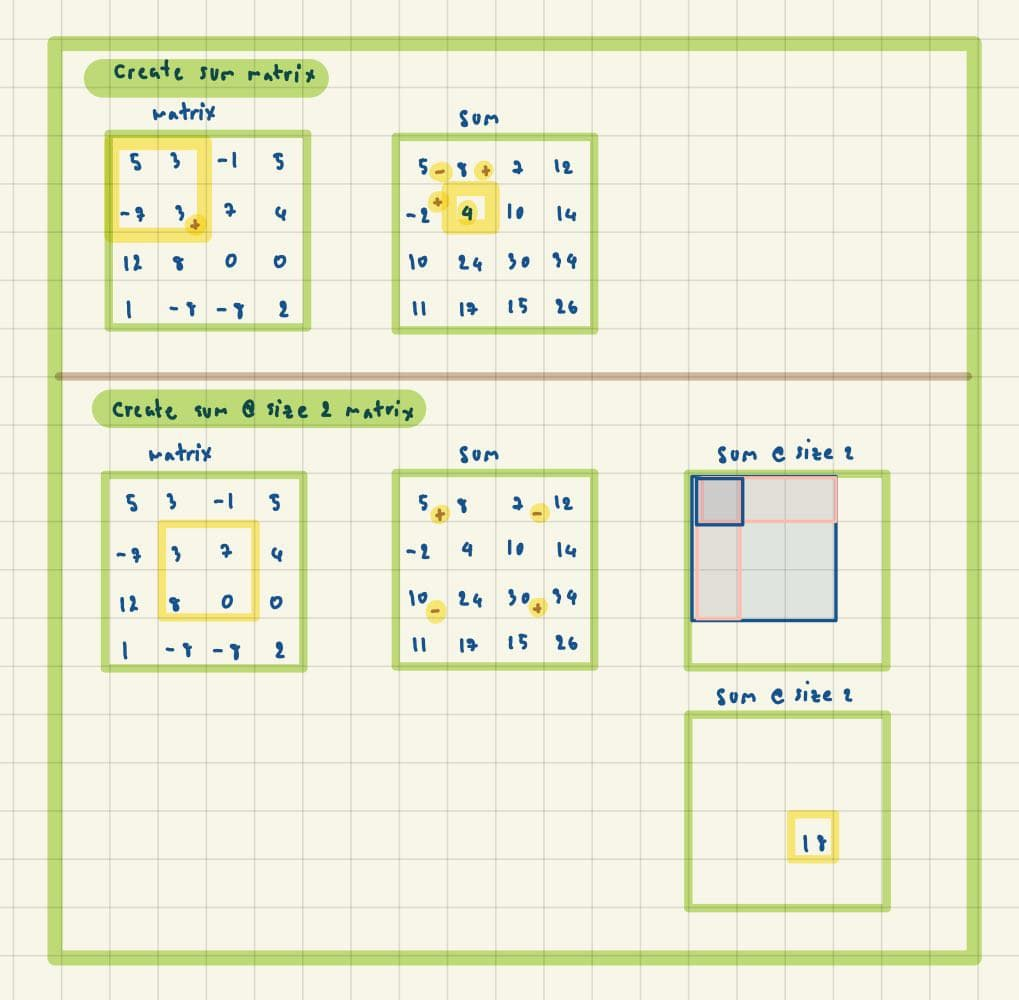

# Solution 2 : Brute Force

In [3]:
# Time O(wh*size^2)
# Space O(1)
def maximumSumSubmatrix(matrix, size):
  max_sum_submatrix = float('-inf')
  for row in range(len(matrix) - size + 1):
    for col in range(len(matrix[0]) - size + 1):
      sum_submatrix = get_sum_submatrix(row, col, matrix, size)
      max_sum_submatrix = max(max_sum_submatrix, sum_submatrix)
  return max_sum_submatrix

def get_sum_submatrix(start_row, start_col, matrix, size):
  sum_submatrix = 0
  for row in range(start_row, start_row + size):
    for col in range(start_col, start_col + size):
      sum_submatrix += matrix[row][col]
  return sum_submatrix

In [4]:
matrix = [
  [5, 3, -1, 5],
  [-7, 3, 7, 4],
  [12, 8, 0, 0],
  [1, -8, -8, 2],
]
size = 2

maximumSumSubmatrix(matrix, size)

18

In [5]:
matrix =[
    [2, 4],
    [5, 6],
    [-3, 2]
  ]
size = 2
maximumSumSubmatrix(matrix, size)

17